<a href="https://colab.research.google.com/github/blinov-89/Kursk_text_model/blob/main/Score_%3D_0_776787_%22%D0%9A%D1%83%D1%80%D1%81%D0%BA_baseline_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загрузим нужные библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
import pandas as pd                 # Pandas — библиотека Python для обработки и анализа структурированных данных
import seaborn as sns               # Seaborn — библиотека для создания статистических графиков
from tqdm.auto import tqdm, trange  # Tqdm — библиотека для создания индикаторов выполнения

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Курск ИИ/train_dataset_train.csv")

## Рассмотрим датасет по ближе

In [5]:
df.head(3)

,id,Текст Сообщения,Тематика,Ответственное лицо,Категория
0,2246,Помогите начальник Льговского рэс не реагирует...,"Нарушения, связанные с содержанием электросети...",Администрация Льговского района,3
1,380,<p>По фасаду дома по адресу ул. Урицкого 22 пр...,Аварийные деревья,Администрация города Курска,3
2,2240,Агресивные собаки. На радуге там стая из подро...,Безнадзорные животные,Администрация города Курска,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2000 non-null   int64 
 1   Текст Сообщения     2000 non-null   object
 2   Тематика            2000 non-null   object
 3   Ответственное лицо  2000 non-null   object
 4   Категория           2000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 78.2+ KB


In [7]:
print(df['Категория'].unique(), len(df['Категория'].unique())) 

[ 3  1 16  0  6  8  4 13 10 11 14  7  5 15  2  9 12] 17


In [8]:
df['Категория'].value_counts()

3     954
0     478
16    149
8     139
4     108
10     48
7      27
1      25
11     19
5      12
13     11
6      10
15      7
9       5
14      4
2       3
12      1
Name: Категория, dtype: int64

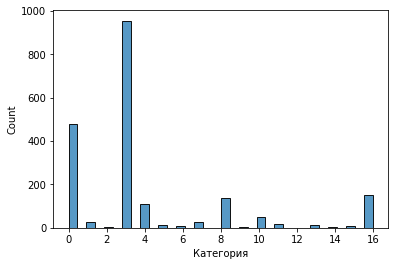

In [9]:
sns.histplot(data=df.Категория)  # Построение гистограммы, проверка сбалансированности исходного набора данных

# балансир

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))

print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

  
# импорт модуля SMOTE из библиотеки imblearn
# pip install imblearn (если у вас нет imblearn в вашей системе)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)

X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

  

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))

print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

  

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

In [ ]:
rat = len(df.loc[df['Категория']==3])//len(df.loc[df['Категория']==12])
rat

954

In [ ]:
df_1 = df.loc[df['Категория']==12]
df_1 = df_1.loc[df_1.index.repeat(rat)]
df_n = pd.concat([df.loc[df['Категория']==3], df_1]).sample(frac=1)

In [ ]:
df_2 = df.loc[df['Категория']==1]
df_2 = df_1.loc[df_1.index.repeat(rat)]
df_n = pd.concat([df.loc[df['Категория']==3], df_1]).sample(frac=1)

In [ ]:
df_2 = df.loc[df['Категория']==1]
df_2['Категория'].value_counts()

1    25
Name: Категория, dtype: int64

In [ ]:
rat = len(df.loc[df['Категория']==3])//len(df.loc[df['Категория']==1])
rat

38

In [ ]:
df_2 = df_2.loc[df_2.index.repeat(rat)]

In [ ]:
df_2['Категория'].value_counts()

1    950
Name: Категория, dtype: int64

In [ ]:
df_n = pd.concat([df_n, df_2]).sample(frac=1)

In [ ]:
df_n['Категория'].value_counts()

12    954
3     954
1     950
Name: Категория, dtype: int64

In [ ]:
df_n['Категория'].value_counts()

12    954
3     954
Name: Категория, dtype: int64

# Предварительная обработка текста

In [10]:
# Создаем датасет, сливаем текстовые колонки, убираем ненужные колонки
data = df.drop(columns=['id']) # Удаление столбца с ID

# Объединение текстовых колонок в одну
data["text"] = data['Текст Сообщения'].astype(str) + " " + data['Ответственное лицо'].astype(str)

# Удаление лишних колонок
data = data.drop(columns=['Текст Сообщения', 'Ответственное лицо'])
data.head()

,Тематика,Категория,text
0,"Нарушения, связанные с содержанием электросети...",3,Помогите начальник Льговского рэс не реагирует...
1,Аварийные деревья,3,<p>По фасаду дома по адресу ул. Урицкого 22 пр...
2,Безнадзорные животные,1,Агресивные собаки. На радуге там стая из подро...
3,Нескошенная сорная растительность в местах общ...,3,<p>На пересечении &nbsp;улиц Сосновская и Бере...
4,Аварийные деревья,3,<p style=`text-align:justify;`><span style=`ba...


In [11]:
# data = df.drop(columns=['id', 'Тематика', 'Ответственное лицо'])

In [12]:
# Подсчет соотношения часла строк к число слов в строке
number_of_samples = len(data)
print("Количество строк (объектов)" , number_of_samples)

number_of_words = 0
for index, row in data.iterrows():
  words = row['text'].split()
  number_of_words += len(words)
number_of_words_per_sample = number_of_words / len(data)
print("Количество cлов в строке" , number_of_words_per_sample)

ratio = number_of_samples / number_of_words_per_sample
print("Соотношение: " , ratio)


Количество строк (объектов) 2000
Количество cлов в строке 55.959
Соотношение:  35.740452831537375


In [13]:
from string import punctuation  # Модуль для работы со строками

# Удаление символов пунктуации
def remove_punctuation(my_string):
    return "".join([ch if ch not in punctuation else ' ' for ch in my_string]) # Замена на пробелы!!!

# Удаление чисел
def remove_numbers(my_string):
    return ''.join([i if not i.isdigit() else ' ' for i in my_string])

# Замена множественных пробелов на одинарный пробел
import re
def remove_multiple_spaces(my_string):
	return re.sub(r'\s+', ' ', my_string, flags=re.I)

# Обработка строк + дополнительно приведение к нижнему регистру
preproccessing = lambda text: (remove_multiple_spaces(remove_numbers(remove_punctuation(text.lower())))) 

# Создаем колонку в датасете для обработанного текста
data['text_processed'] = list(map(preproccessing, data['text']))
data.head()

,Тематика,Категория,text,text_processed
0,"Нарушения, связанные с содержанием электросети...",3,Помогите начальник Льговского рэс не реагирует...,помогите начальник льговского рэс не реагирует...
1,Аварийные деревья,3,<p>По фасаду дома по адресу ул. Урицкого 22 пр...,p по фасаду дома по адресу ул урицкого проход...
2,Безнадзорные животные,1,Агресивные собаки. На радуге там стая из подро...,агресивные собаки на радуге там стая из подрос...
3,Нескошенная сорная растительность в местах общ...,3,<p>На пересечении &nbsp;улиц Сосновская и Бере...,p на пересечении nbsp улиц сосновская и берег...
4,Аварийные деревья,3,<p style=`text-align:justify;`><span style=`ba...,p style text align justify span style backgro...


## Стемминг

Сте́мминг (англ. stemming — находить происхождение) — это процесс нахождения основы слова для заданного исходного слова. Основа слова не обязательно совпадает с морфологическим корнем слова. Стемминг является частью процесса нормализации текста.

Конкретный способ решения задачи поиска основы слов называется алгоритм стемминга, а конкретная реализация — стеммер

In [14]:
# NLTK - библиотек Python для решения задач обработки естественного языка
import nltk

from nltk.stem.snowball import SnowballStemmer    # Стеммер Porter2 - новая версия стеммера Портера
from nltk.corpus import stopwords                 # Библиотека стоп-слов
from nltk import word_tokenize                    # Токенизатор

nltk.download('stopwords')                        # Загрузка стоп-слов
nltk.download('punkt')                            # Загрузка символов пунктуации
stemmer = SnowballStemmer("russian")              # Стеммер для русского языка

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
russian_stopwords = stopwords.words("russian")    # Список стоп-слов для русского языка
# Расширение списка стоп-слов (см. набор данных)
russian_stopwords.extend(['…', '«', '»', '...', 'т.д.', 'т', 'д', 'nan'])

In [16]:
# Провердим стемминг и избавляемся от стоп-слов
stemmed_text_column = []
for text in tqdm(data['text_processed']):
    tokens = word_tokenize(text)    
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in russian_stopwords]
    text = " ".join(stemmed_tokens)
    stemmed_text_column.append(text)

# Создаем новую колонку в наборе данных
data['text_stemmed'] = stemmed_text_column
data['text_stemmed'][0]

  0%|          | 0/2000 [00:00<?, ?it/s]

'помог начальник льговск рэс реагир жалоб мал ветер сид свет имен деревн больш угон улиц стар слобод пожалуйст помог пуска вычист фотоотчет сдела администрац льговск район'

In [17]:
data.head()

,Тематика,Категория,text,text_processed,text_stemmed
0,"Нарушения, связанные с содержанием электросети...",3,Помогите начальник Льговского рэс не реагирует...,помогите начальник льговского рэс не реагирует...,помог начальник льговск рэс реагир жалоб мал в...
1,Аварийные деревья,3,<p>По фасаду дома по адресу ул. Урицкого 22 пр...,p по фасаду дома по адресу ул урицкого проход...,p фасад дом адрес ул урицк проход труб газов м...
2,Безнадзорные животные,1,Агресивные собаки. На радуге там стая из подро...,агресивные собаки на радуге там стая из подрос...,агресивн собак радуг ста подросш щенк звросл с...
3,Нескошенная сорная растительность в местах общ...,3,<p>На пересечении &nbsp;улиц Сосновская и Бере...,p на пересечении nbsp улиц сосновская и берег...,p пересечен nbsp улиц сосновск берегов nbsp за...
4,Аварийные деревья,3,<p style=`text-align:justify;`><span style=`ba...,p style text align justify span style backgro...,p style text align justify span style backgrou...


## Лемматизация

Лемматиза́ция — процесс приведения словоформы к лемме — её нормальной (словарной) форме.

In [18]:
!pip install pymorphy2            # pymorphy2 - морфологический анализатор для русского языка
!pip install pymorphy2-dicts      # пакет со словарями
!pip install DAWG-Python          


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 8.2 MB 16.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.1 MB 7.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [20]:
# Провердим лемматизацию и избавляемся от стоп-слов
lemm_texts_column = []
for text in tqdm(data['text_processed']):
    tokens = word_tokenize(text)    
    lemmed_tokens = [morph.parse(token)[0].normal_form for token in tokens if token not in russian_stopwords]
    text = " ".join(lemmed_tokens)
    lemm_texts_column.append(text)
    
# Создаем новую колонку в наборе данных
data['text_lemmed'] = lemm_texts_column

data['text_lemmed'][0]

  0%|          | 0/2000 [00:00<?, ?it/s]

'помочь начальник льговский рэс реагировать жалоба малый ветер сидеть свет именно деревня больший угон улица старый слобода пожалуйста помочь пускай вычистить фотоотчёт сделать администрация льговский район'

In [21]:
data.head()

,Тематика,Категория,text,text_processed,text_stemmed,text_lemmed
0,"Нарушения, связанные с содержанием электросети...",3,Помогите начальник Льговского рэс не реагирует...,помогите начальник льговского рэс не реагирует...,помог начальник льговск рэс реагир жалоб мал в...,помочь начальник льговский рэс реагировать жал...
1,Аварийные деревья,3,<p>По фасаду дома по адресу ул. Урицкого 22 пр...,p по фасаду дома по адресу ул урицкого проход...,p фасад дом адрес ул урицк проход труб газов м...,p фасад дом адрес ул урицкий проходить труба г...
2,Безнадзорные животные,1,Агресивные собаки. На радуге там стая из подро...,агресивные собаки на радуге там стая из подрос...,агресивн собак радуг ста подросш щенк звросл с...,агресивный собака радуга стая подрасти щенок з...
3,Нескошенная сорная растительность в местах общ...,3,<p>На пересечении &nbsp;улиц Сосновская и Бере...,p на пересечении nbsp улиц сосновская и берег...,p пересечен nbsp улиц сосновск берегов nbsp за...,p пересечение nbsp улица сосновский береговой ...
4,Аварийные деревья,3,<p style=`text-align:justify;`><span style=`ba...,p style text align justify span style backgro...,p style text align justify span style backgrou...,p style text align justify span style backgrou...


## Токенизация

Токенизация - процесс разделения текста на составляющие (слова, предложения, группы слов).

In [22]:
# from nltk import word_tokenize

word_tokenize(data['text_lemmed'][0])

['помочь',
 'начальник',
 'льговский',
 'рэс',
 'реагировать',
 'жалоба',
 'малый',
 'ветер',
 'сидеть',
 'свет',
 'именно',
 'деревня',
 'больший',
 'угон',
 'улица',
 'старый',
 'слобода',
 'пожалуйста',
 'помочь',
 'пускай',
 'вычистить',
 'фотоотчёт',
 'сделать',
 'администрация',
 'льговский',
 'район']

## Мешок слов

Мешок слов (bag-of-words) — упрощенное представление текста, которое используется в обработке естественных языков и информационном поиске. В этой модели текст представляется в виде множества его слов без какого-либо учета грамматики и порядка слов, но с сохранением информации об их количестве.


In [23]:
# CountVectorizer - класс конвертации текста в матрицу токенов
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
# Создание матрицы признаков на основе мешка слов
count = CountVectorizer()
bag_of_words = count.fit_transform(data['text_lemmed'])
bag_of_words.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
count.get_feature_names_out()  # Вывод имен признаков

array(['actual', 'address', 'aesfpebagmfblc', ..., 'ёж', 'ёлка', 'ёлочка'],
      dtype=object)

In [26]:
# Создание матрицы признаков для 2-грамм
count_2gram = CountVectorizer(ngram_range=(2,2))
bag_of_2grams = count_2gram.fit_transform(data['text_lemmed'])
bag_of_2grams.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
count_2gram.get_feature_names_out()  # Вывод имен признаков

array(['actual amp', 'address span', 'aesfpebagmfblc xn', ...,
       'ёлка новый', 'ёлка озеленить', 'ёлочка надеяться'], dtype=object)

## Взвешивание важности слов - TF-IDF

TF-IDF (TF — term frequency, IDF — inverse document frequency) — статистическая мера, используемая для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса. Вес некоторого слова (от 0 до 1) пропорционален частоте употребления этого слова в документе и обратно пропорционален частоте употребления слова во всех документах коллекции.

Мера TF-IDF часто используется в задачах анализа текстов и информационного поиска, например, как один из критериев релевантности документа поисковому запросу, при расчёте меры близости документов при кластеризации или классификации.

In [28]:
# TfidfVectorizer - класс для преобразования текста в частотные векторы слов
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
# Создание матрицы признаков
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(data['text_lemmed'])
feature_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Финальный датасет

In [30]:
# Матрица признаков
X = data['text_lemmed']

# Вектор значений целевых переменных
y = data['Категория']

labels = data['Категория'].unique() # Массив уникальных меток


In [31]:
X

0       помочь начальник льговский рэс реагировать жал...
1       p фасад дом адрес ул урицкий проходить труба г...
2       агресивный собака радуга стая подрасти щенок з...
3       p пересечение nbsp улица сосновский береговой ...
4       p style text align justify span style backgrou...
                              ...                        
1995    p вечерний время появиться вонь грибной радуга...
1996    p добрый день хотеть сообщить проблема возле н...
1997    состоять засохнуть дерево больший берёза один ...
1998    пожалуйста роман владимирович скорый время кур...
1999    p сдать пцр тест г результат тест портал “ гос...
Name: text_lemmed, Length: 2000, dtype: object

In [32]:
len(labels)

17

In [33]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size=0.25)

In [35]:
y_train.unique()

array([10,  0,  4, 16,  3, 11,  8,  5,  6,  7,  1, 15, 13, 14,  9, 12,  2])

# Наивный байесовский классификатор (Naive Bayes Classifier)

Наивный байесовский классификатор — простой вероятностный классификатор, основанный на применении теоремы Байеса со строгими (наивными) предположениями о независимости. Достоинством наивного байесовского классификатора является малое количество данных, необходимых для обучения, оценки параметров и классификации.

In [36]:
# Загрузка Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer


In [37]:
# Автоматизация предварительных преобразований данных перед обучением модели 
nb = Pipeline([('vect', CountVectorizer(ngram_range=(1, 1))),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()), # Классификатор Naive Bayes для мультиномиальных моделей
              ])

In [38]:
%%time
nb.fit(X_train, y_train)   # Обучение модели

CPU times: user 108 ms, sys: 3 ms, total: 111 ms
Wall time: 113 ms


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [39]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)  # Предсказание на тестовых данных

CPU times: user 37.9 ms, sys: 951 µs, total: 38.9 ms
Wall time: 44.1 ms


In [40]:
# Оценка точности классификации
from sklearn.metrics import accuracy_score
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.574


In [41]:
# print(classification_report(y_test, y_pred, target_names=labels))

### Метрики точности
*   accuracy - доля правильных ответов
*   precision - точность (доля объектов, названных классификатором положительными и при этом действительно являющимися положительными)  
*   recall - полнота (доля объектов положительного класса из всех объектов положительного класса)
*   f1-score - среднее гармоническое precision и recall 

Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.

F1-score - достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю



# Логистическая регрессия (Logistic Regression)

Cтатистическая модель, используемая для прогнозирования вероятности возникновения некоторого события путём его сравнения с логистической кривой

In [42]:
# Загрузка логистической регрессии
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer(ngram_range=(1, 1))),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])

In [43]:
# # Загрузка логистической регрессии
# from sklearn.linear_model import LogisticRegression

# logreg = Pipeline([
#                 ('vect', CountVectorizer(analyzer='char', ngram_range =([2,10]))),
#                 ('tfidf', TfidfTransformer()),
#                 ('clf', LogisticRegression(n_jobs=3,C=1e5, solver='saga', 
#                                            multi_class='multinomial',
#                                            max_iter=1000,
#                                            random_state=42)),
# ])

In [44]:
%%time
logreg.fit(X_train, y_train) # Обучение модели

CPU times: user 3.45 s, sys: 2.47 s, total: 5.92 s
Wall time: 3.81 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=1))])

In [45]:
%%time
y_pred = logreg.predict(X_test)   # Предсказание на тестовых данных

CPU times: user 47.8 ms, sys: 17.1 ms, total: 64.9 ms
Wall time: 66 ms


In [46]:
# Оценка точности классификации
print('accuracy %s' % accuracy_score(y_pred, y_test))
# print(classification_report(y_test, y_pred, target_names=labels))

accuracy 0.838


In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
# print(classification_report(y_test, y_pred, target_names=labels))
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

F1 Score: 0.8245873473659078


# cloud

In [71]:
from wordcloud import WordCloud

In [72]:
text = ' '.join(data['text_lemmed'].astype(str).str.lower().tolist())
wc = WordCloud().generate_from_text(text)

def generate_basic_wordcloud(data):
    cloud = WordCloud(width=600,
                      height=480,
                      max_words=150,
                      colormap='tab20c',
                      stopwords=stopwords.words('english'),
                      collocations=True).generate_from_text(data)
    plt.figure(figsize=(15,12))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

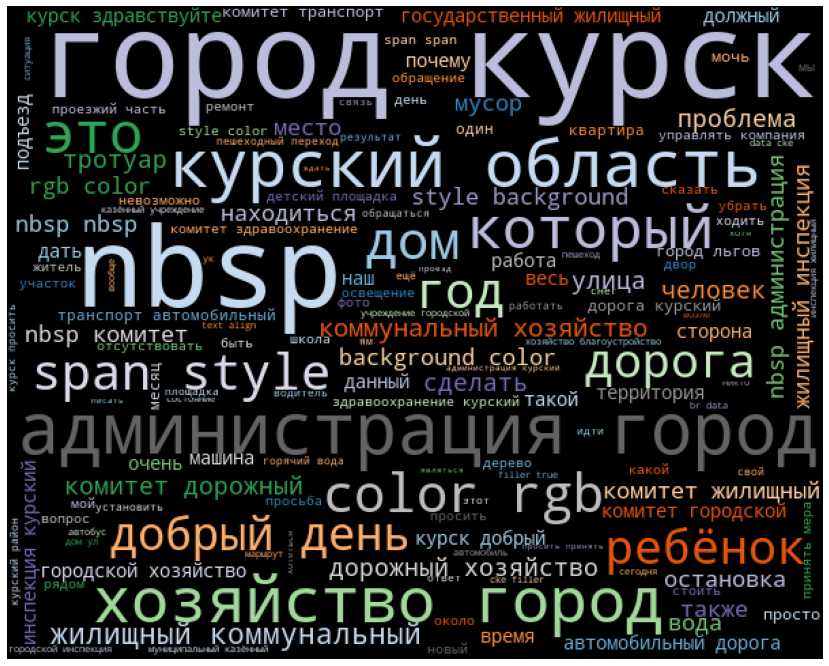

In [73]:
generate_basic_wordcloud(text)

# Предсказание

In [76]:
test_df = pd.read_csv("/content/drive/MyDrive/Курск ИИ/test_dataset_test.csv")
test_df.head(3)

,id,Текст Сообщения,Тематика,Ответственное лицо
0,843,<p>Здравствуйте. На улице Мира &nbsp;было заме...,Неработающее наружное освещение,Администрация Курчатовского района
1,1422,<p>Уже вторую неделю не горит уличное освещени...,Неработающее наружное освещение,Комитет жилищно-коммунального хозяйства города...
2,2782,Не работает освещение во дворе дома 11а по Эне...,Неработающее наружное освещение,Комитет жилищно-коммунального хозяйства города...


In [77]:
Y_test2=test_df[['id']]

In [78]:
# test_df = test_df.drop(columns=['id', 'Тематика', 'Ответственное лицо'])
# test_df.head(3)

In [79]:
# Создаем датасет, сливаем текстовые колонки, убираем ненужные колонки
test_df = test_df.drop(columns=['id']) # Удаление столбца с ID

# Объединение текстовых колонок в одну
test_df["text"] = test_df['Текст Сообщения'].astype(str) + " " + test_df['Ответственное лицо'].astype(str)

# Удаление лишних колонок
test_df = test_df.drop(columns=['Текст Сообщения', 'Ответственное лицо', 'Тематика'])
test_df.head()

,text
0,<p>Здравствуйте. На улице Мира &nbsp;было заме...
1,<p>Уже вторую неделю не горит уличное освещени...
2,Не работает освещение во дворе дома 11а по Эне...
3,После покоса сорной растительности на газоне м...
4,<p>Прошу принять меры к водителю маршрута 263:...


In [80]:
from string import punctuation  # Модуль для работы со строками

# Удаление символов пунктуации
def remove_punctuation(my_string):
    return "".join([ch if ch not in punctuation else ' ' for ch in my_string]) # Замена на пробелы!!!

# Удаление чисел
def remove_numbers(my_string):
    return ''.join([i if not i.isdigit() else ' ' for i in my_string])

# Замена множественных пробелов на одинарный пробел
import re
def remove_multiple_spaces(my_string):
	return re.sub(r'\s+', ' ', my_string, flags=re.I)

# Обработка строк + дополнительно приведение к нижнему регистру
preproccessing = lambda text: (remove_multiple_spaces(remove_numbers(remove_punctuation(text.lower())))) 

# Создаем колонку в датасете для обработанного текста
test_df['text_processed'] = list(map(preproccessing, test_df['text']))
test_df.head()

,text,text_processed
0,<p>Здравствуйте. На улице Мира &nbsp;было заме...,p здравствуйте на улице мира nbsp было замене...
1,<p>Уже вторую неделю не горит уличное освещени...,p уже вторую неделю не горит уличное освещени...
2,Не работает освещение во дворе дома 11а по Эне...,не работает освещение во дворе дома а по энерг...
3,После покоса сорной растительности на газоне м...,после покоса сорной растительности на газоне м...
4,<p>Прошу принять меры к водителю маршрута 263:...,p прошу принять меры к водителю маршрута пос ...


In [81]:
# Провердим стемминг и избавляемся от стоп-слов
stemmed_text_column = []
for text in tqdm(test_df['text_processed']):
    tokens = word_tokenize(text)    
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in russian_stopwords]
    text = " ".join(stemmed_tokens)
    stemmed_text_column.append(text)

# Создаем новую колонку в наборе данных
test_df['text_stemmed'] = stemmed_text_column
test_df['text_stemmed'][0]

  0%|          | 0/1000 [00:00<?, ?it/s]

'p здравств улиц мир nbsp замен наружн освещен имен замен ламп nbsp энергосберега ламп протяжен нескольк месяц освещен улиц отсутств последн улиц освещ эт зим приблизительн кажд ден люд работа часов смен мног возвраща очен поздн дан проблем улиц поселк nbsp p администрац курчатовск район'

In [82]:
test_df.head()

,text,text_processed,text_stemmed
0,<p>Здравствуйте. На улице Мира &nbsp;было заме...,p здравствуйте на улице мира nbsp было замене...,p здравств улиц мир nbsp замен наружн освещен ...
1,<p>Уже вторую неделю не горит уличное освещени...,p уже вторую неделю не горит уличное освещени...,p втор недел гор уличн освещен p p nbsp p коми...
2,Не работает освещение во дворе дома 11а по Эне...,не работает освещение во дворе дома а по энерг...,работа освещен двор дом энергетик светов опор ...
3,После покоса сорной растительности на газоне м...,после покоса сорной растительности на газоне м...,покос сорн растительн газон тротуар проезж час...
4,<p>Прошу принять меры к водителю маршрута 263:...,p прошу принять меры к водителю маршрута пос ...,p прош приня мер водител маршрут пос северн со...


## Лемматизация

Лемматиза́ция — процесс приведения словоформы к лемме — её нормальной (словарной) форме.

In [83]:
# Провердим лемматизацию и избавляемся от стоп-слов
lemm_texts_column = []
for text in tqdm(test_df['text_processed']):
    tokens = word_tokenize(text)    
    lemmed_tokens = [morph.parse(token)[0].normal_form for token in tokens if token not in russian_stopwords]
    text = " ".join(lemmed_tokens)
    lemm_texts_column.append(text)
    
# Создаем новую колонку в наборе данных
test_df['text_lemmed'] = lemm_texts_column

test_df['text_lemmed'][0]

  0%|          | 0/1000 [00:00<?, ?it/s]

'p здравствуйте улица мир nbsp заменить наружное освещение именно заменить лампа nbsp энергосберегающий лампа протяжение несколько месяц освещение улица отсутствовать последний улица осветить это зима приблизительно каждый день человек работать часовой смена многие возвращаться очень поздно дать проблема улица посёлок nbsp p администрация курчатовский район'

In [84]:
test_df.head()

,text,text_processed,text_stemmed,text_lemmed
0,<p>Здравствуйте. На улице Мира &nbsp;было заме...,p здравствуйте на улице мира nbsp было замене...,p здравств улиц мир nbsp замен наружн освещен ...,p здравствуйте улица мир nbsp заменить наружно...
1,<p>Уже вторую неделю не горит уличное освещени...,p уже вторую неделю не горит уличное освещени...,p втор недел гор уличн освещен p p nbsp p коми...,p второй неделя гореть уличный освещение p p n...
2,Не работает освещение во дворе дома 11а по Эне...,не работает освещение во дворе дома а по энерг...,работа освещен двор дом энергетик светов опор ...,работать освещение двор дом энергетик световой...
3,После покоса сорной растительности на газоне м...,после покоса сорной растительности на газоне м...,покос сорн растительн газон тротуар проезж час...,покос сорный растительность газон тротуар прое...
4,<p>Прошу принять меры к водителю маршрута 263:...,p прошу принять меры к водителю маршрута пос ...,p прош приня мер водител маршрут пос северн со...,p просить принять мера водитель маршрут пос се...


## Токенизация

Токенизация - процесс разделения текста на составляющие (слова, предложения, группы слов).

In [85]:
# from nltk import word_tokenize

word_tokenize(test_df['text_lemmed'][0])

['p',
 'здравствуйте',
 'улица',
 'мир',
 'nbsp',
 'заменить',
 'наружное',
 'освещение',
 'именно',
 'заменить',
 'лампа',
 'nbsp',
 'энергосберегающий',
 'лампа',
 'протяжение',
 'несколько',
 'месяц',
 'освещение',
 'улица',
 'отсутствовать',
 'последний',
 'улица',
 'осветить',
 'это',
 'зима',
 'приблизительно',
 'каждый',
 'день',
 'человек',
 'работать',
 'часовой',
 'смена',
 'многие',
 'возвращаться',
 'очень',
 'поздно',
 'дать',
 'проблема',
 'улица',
 'посёлок',
 'nbsp',
 'p',
 'администрация',
 'курчатовский',
 'район']

## Мешок слов

Мешок слов (bag-of-words) — упрощенное представление текста, которое используется в обработке естественных языков и информационном поиске. В этой модели текст представляется в виде множества его слов без какого-либо учета грамматики и порядка слов, но с сохранением информации об их количестве.


In [86]:
# Создание матрицы признаков на основе мешка слов
count = CountVectorizer()
bag_of_words = count.fit_transform(test_df['text_lemmed'])
bag_of_words.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [87]:
count.get_feature_names_out()  # Вывод имен признаков

array(['abesedino', 'align', 'amp', ..., 'ёлка', 'ёлочка', 'ёлочный'],
      dtype=object)

In [88]:
# Создание матрицы признаков для 2-грамм
count_2gram = CountVectorizer(ngram_range=(2,2))
bag_of_2grams = count_2gram.fit_transform(test_df['text_lemmed'])
bag_of_2grams.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [89]:
count_2gram.get_feature_names_out()  # Вывод имен признаков

array(['abesedino mail', 'align center', 'align justify', ...,
       'ёлочка nbsp', 'ёлочный игрушка', 'ёлочный шар'], dtype=object)

## Взвешивание важности слов - TF-IDF

TF-IDF (TF — term frequency, IDF — inverse document frequency) — статистическая мера, используемая для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса. Вес некоторого слова (от 0 до 1) пропорционален частоте употребления этого слова в документе и обратно пропорционален частоте употребления слова во всех документах коллекции.

Мера TF-IDF часто используется в задачах анализа текстов и информационного поиска, например, как один из критериев релевантности документа поисковому запросу, при расчёте меры близости документов при кластеризации или классификации.

In [90]:
# Создание матрицы признаков
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(test_df['text_lemmed'])
feature_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Финальный датасет

In [94]:
test_df

,text,text_processed,text_stemmed,text_lemmed
0,<p>Здравствуйте. На улице Мира &nbsp;было заме...,p здравствуйте на улице мира nbsp было замене...,p здравств улиц мир nbsp замен наружн освещен ...,p здравствуйте улица мир nbsp заменить наружно...
1,<p>Уже вторую неделю не горит уличное освещени...,p уже вторую неделю не горит уличное освещени...,p втор недел гор уличн освещен p p nbsp p коми...,p второй неделя гореть уличный освещение p p n...
2,Не работает освещение во дворе дома 11а по Эне...,не работает освещение во дворе дома а по энерг...,работа освещен двор дом энергетик светов опор ...,работать освещение двор дом энергетик световой...
3,После покоса сорной растительности на газоне м...,после покоса сорной растительности на газоне м...,покос сорн растительн газон тротуар проезж час...,покос сорный растительность газон тротуар прое...
4,<p>Прошу принять меры к водителю маршрута 263:...,p прошу принять меры к водителю маршрута пос ...,p прош приня мер водител маршрут пос северн со...,p просить принять мера водитель маршрут пос се...
...,...,...,...,...
995,"Добрый день! Я и моя семья жители пос Волокно,...",добрый день я и моя семья жители пос волокно м...,добр ден сем жител пос волокн просыпа засыпа у...,добрый день семья житель пос волокно просыпать...
996,На Лазарева 5 г.Щигры ветка тополя скоро выбье...,на лазарева г щигры ветка тополя скоро выбьет ...,лазарев г щигр ветк топол скор выбьет стекл ба...,лазарев г щигры ветка тополь скоро выбить стек...
997,Перед входом Комитет образования Курска ямы...,перед входом комитет образования курска ямы на...,вход комитет образован курск ям дорог комитет ...,вход комитет образование курск ям дорога комит...
998,<p>Доброго времени суток</p><p>У меня на пол г...,p доброго времени суток p p у меня на пол год...,p добр времен суток p p пол год медотвод вакци...,p добрый время сутки p p пол год медотвод вакц...


In [95]:
test = test_df.drop(columns=['text', 'text_processed', 'text_stemmed'])

In [96]:
test.head

<bound method NDFrame.head of                                            text_lemmed
0    p здравствуйте улица мир nbsp заменить наружно...
1    p второй неделя гореть уличный освещение p p n...
2    работать освещение двор дом энергетик световой...
3    покос сорный растительность газон тротуар прое...
4    p просить принять мера водитель маршрут пос се...
..                                                 ...
995  добрый день семья житель пос волокно просыпать...
996  лазарев г щигры ветка тополь скоро выбить стек...
997  вход комитет образование курск ям дорога комит...
998  p добрый время сутки p p пол год медотвод вакц...
999  добрый день многодетный мама младший ребёнок г...

[1000 rows x 1 columns]>

# pred

In [97]:
# Матрица признаков
test_df = test_df['text_lemmed']

In [98]:
test_df

0      p здравствуйте улица мир nbsp заменить наружно...
1      p второй неделя гореть уличный освещение p p n...
2      работать освещение двор дом энергетик световой...
3      покос сорный растительность газон тротуар прое...
4      p просить принять мера водитель маршрут пос се...
                             ...                        
995    добрый день семья житель пос волокно просыпать...
996    лазарев г щигры ветка тополь скоро выбить стек...
997    вход комитет образование курск ям дорога комит...
998    p добрый время сутки p p пол год медотвод вакц...
999    добрый день многодетный мама младший ребёнок г...
Name: text_lemmed, Length: 1000, dtype: object

In [99]:
pred = logreg.predict(test_df) 

In [100]:
Y_test2['Категория']=pd.DataFrame(pred)

In [102]:
Y_test2.head()

,id,Категория
0,843,3
1,1422,3
2,2782,3
3,2704,3
4,1,8


In [103]:
Y_test2.to_csv("submit_k.csv", index=False)

## **Score = 0.776787**